In [52]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

def find_csv( dataset_name, epsilon, e1_r, e2_r):
#     results_path ="../our_results"
#     # Define the file name pattern
#     pattern = f"{dataset_name}_{epsilon:.2f}_{e1_r:.2f}_{e2_r:.2f}_*.csv"

#     # Construct the full path pattern
#     full_pattern = os.path.join(results_path, pattern)
    
#     # Use glob to find matching files
#     matching_files = glob.glob(full_pattern)
#     ours =  matching_files[0]
    
    
    base =f"{dataset_name}_*.csv"
    pattern = os.path.join("../baselines", base)
    
    # Use glob to find matching files
    files = glob.glob(pattern)
    baseline = files[0]

    return  baseline


In [2]:

def plot(csv_files, baseline, N):
    metrics = ['nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel']
    our_params = pd.DataFrame(columns=['eps', 'nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel'])
    for eps in csv_files.keys():
        # Read CSV file into a DataFrame
        df = pd.read_csv(csv_files[eps])
        df1 = df[df['N'] == N]
        concat = df1.groupby('N').mean().reset_index()
        our_params = pd.concat([our_params, concat], ignore_index=True)

  
    df2 = pd.read_csv(baseline)
    baseline = df2.groupby('eps').mean().reset_index()
    print(baseline)

    fig, axes = plt.subplots(7, 6, figsize=(20, 3))

    for metric, ax in zip(metrics, axes.T):

        # Plot the line for the average NMI
        ax.plot(our_params['eps'], our_params[metric], label="predicted params", marker='o', linestyle='-')
        ax.set_title(metric)
        ax.set_xlabel('epislon') 
        ax.plot(baseline['eps'], baseline[metric], label="default", marker='o', linestyle='-')
        ax.legend()


        # Customize the plot
    #     plt.title('Average NMI per eps')
#         ax.xlabel('epsilon')
#         ax.ylabel(metric)
        ax.legend()
        ax.grid(False)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [181]:
from matplotlib.ticker import FormatStrFormatter


def plot(csv_files, baselines_files, params):
    datasets = ["Bitcoin","CA-HepPh", "Chamelon","Congress", "Facebook"]

    metrics = ['nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel']
    metric_fullnames ={
        'nmi': "NMI (Community Discovery)",
        'evc_overlap': "Overlap (Eigenvalue Nodes)",
        'evc_MAE': "MAE (Eigenvalue)",
        'deg_kl': "KL Divergence (Degree Distribution)",
        'diam_rel': "RE (Diameter)",
        'cc_rel': "RE (Clustering Coefficient)",
        'mod_rel': "RE (Modularity)",
    }
    our_params = pd.DataFrame(columns=['data', 'eps', 'nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel'])
    baselines = pd.DataFrame(columns=['data', 'eps', 'nmi', 'evc_overlap' ,'evc_MAE','deg_kl','diam_rel','cc_rel','mod_rel'])
    for name in datasets:
        data = csv_files[name]
        param = params[name]
        for eps in data.keys():
            
            df = pd.read_csv(data[eps])
    
    
            
            if name == 'CA-HepPh' and eps == 0.5:
                concat = df.groupby('eps').mean().reset_index()
                
                
            else:
                df1 = df[df['N'] == param[eps][0]]
                concat = df1.groupby('N').mean().reset_index()
                
           
            concat['data']=name
            our_params = pd.concat([our_params, concat], ignore_index=True)
            
            

         
        df2 = pd.read_csv(baselines_files[name])
        concat2 = df2.groupby('eps').mean().reset_index()
        concat2['data']=name
        baselines = pd.concat([baselines, concat2], ignore_index=True)
        

        
    fig, axes = plt.subplots(len(metrics), len(datasets), figsize=(15, 20))

    
    # Plot each metric on a separate subplot
    for metric, ax_row in (zip(metrics, axes)):  
        for j, (name, ax) in enumerate(zip(datasets, ax_row)):
            dataset = our_params[our_params['data'] == name]
            baseline = baselines[baselines['data'] == name]


            ax.plot(dataset['eps'], dataset[metric], label="Predicted Hyperparameters", marker='o', linestyle='-')
            ax.set_xlabel(r"$ \epsilon$") 
            ax.plot(baseline['eps'], baseline[metric], label="Default Hyperparameters", marker='o', linestyle='-')
#             ax.legend()
            ax.patch.set_facecolor('#B3BAC4')
            ax.patch.set_alpha(0.5)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax.grid(False)
            if j > 0:
                ax.set_yticklabels([])
        ax_row[0].set_ylabel(f'{metric_fullnames[metric]}')


        for ax in ax_row:
            ax.set_ylim(bottom=0, top=max([ax.get_ylim()[1] for ax in ax_row]))

            
            
    for i, dataset_name in enumerate(datasets):
        axes[0, i].set_title(f'{dataset_name}')
    
    
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))



    plt.tight_layout()
    plt.savefig('comparisongraphs.png', bbox_inches='tight')
    plt.show()


    
    
    
    
    
    

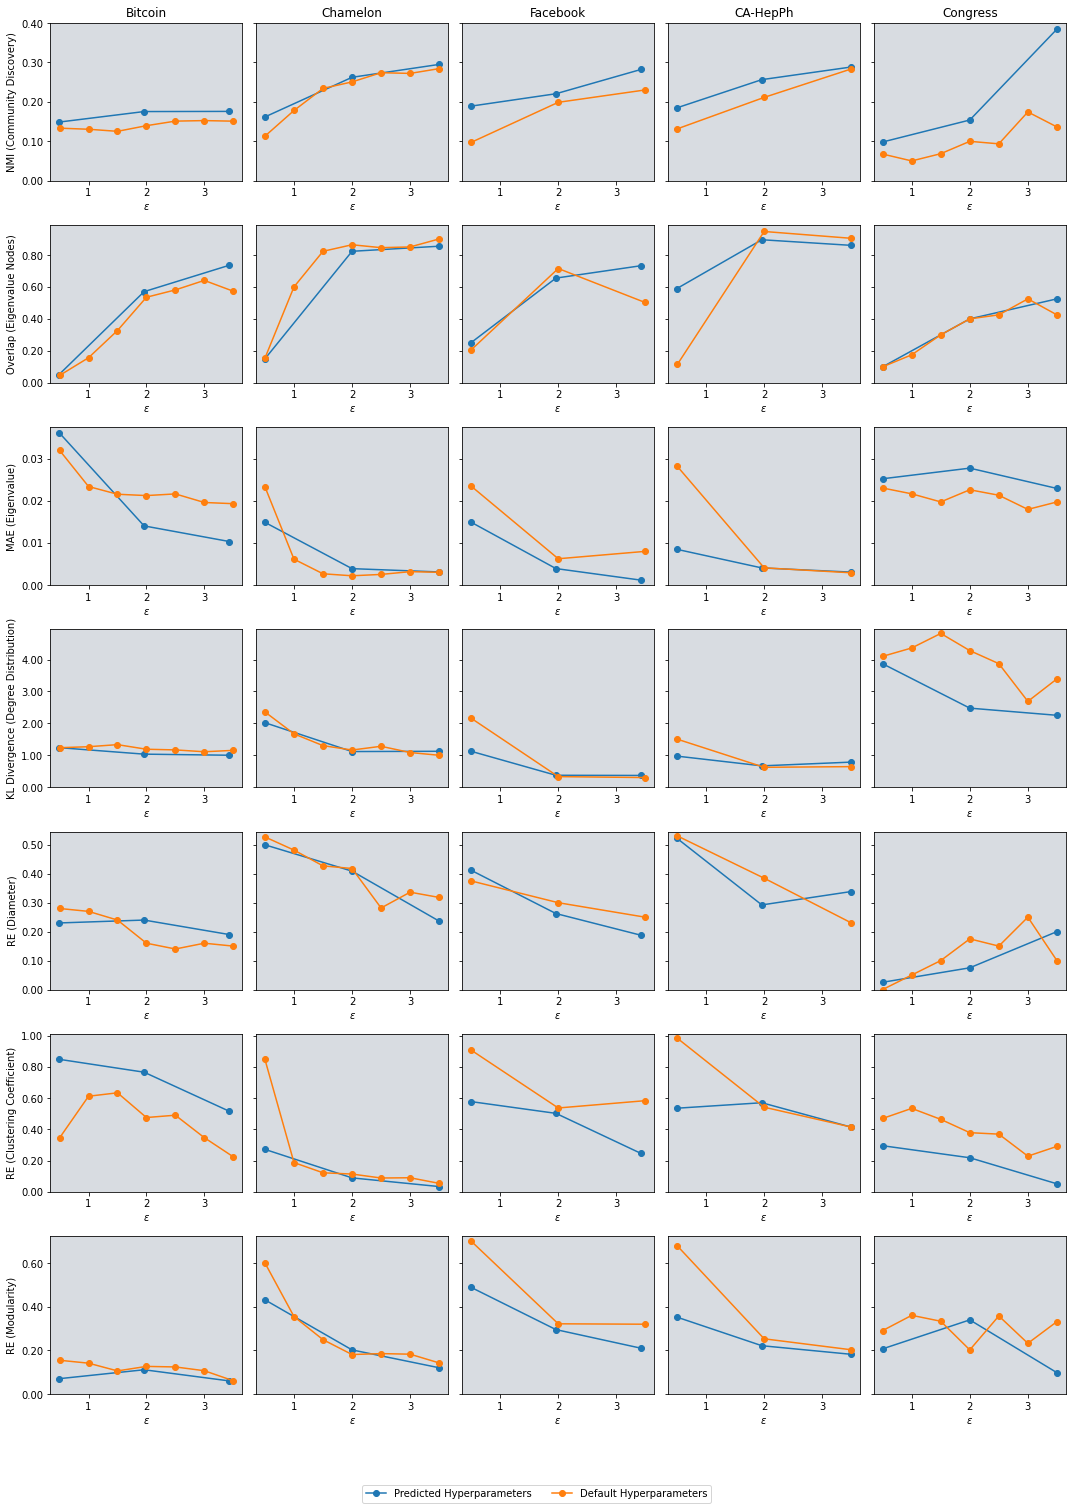

In [182]:
ours = {} # maps dataset  -> map of (e -> location)
baselines = {}
dataset = [ "Bitcoin", "CA-HepPh", "Chamelon", "Facebook", "Congress"]
   
#fake numbers 
predicted_params ={
   "Bitcoin": {
        0.5: [55, .1, .7], #map e -> [N, e1, e2]
        2: [35, .3 , .6],
        3.5: [30, .3, .6]
    },
    "CA-HepPh": {
        0.5: [45, .3, .6], #map e -> [N, e1, e2]
        2: [30, .4 , .5],
        3.5: [20, .5, .4]
    },
    "Chamelon": {
        0.5: [40, .3, .6], #map e -> [N, e1, e2]
        2: [35, .3 , .6],
        3.5: [15, .5, .4]
    },
     "Congress": {
        0.5: [35, .1, .7], #map e -> [N, e1, e2]
        2: [25, .2 , .7],
        3.5: [10, .4, .5]
    },
    "Enron": {
        0.5: [50, .1, .7], #map e -> [N, e1, e2]
        2: [35, .1 , .7],
        3.5: [30, .1, .7]
    },
    "Facebook": {
        0.5: [30, .5, .4], #map e -> [N, e1, e2]
        2: [15, .6 , .3],
        3.5: [5, .7, .2]
    },
}


for data in dataset:
    for e in [0.5, 2, 3.5]:
        params = predicted_params[data][e]
        baseline = find_csv(data, e, params[1] , params[2])
        baselines[data] = baseline
#         ours[data][e] = pred

    
ours = {'Bitcoin': 
 {0.5: '../our_params/Bitcoin_0.49_0.10_0.70_10.csv',
  2: '../our_params/Bitcoin_1.96_0.30_0.60_10.csv', 
  3.5: '../our_params/Bitcoin_3.43_0.30_0.60_10.csv'}, 
'Chamelon': 
 {0.5: '../our_results/Chamelon_0.50_0.30_0.60_10.csv',
  2: '../our_results/Chamelon_2.00_0.30_0.60_10.csv', 
  3.5: '../our_results/Chamelon_3.50_0.50_0.40_10.csv'},
 'Facebook': 
 {0.5: '../our_params/facebook_30_1.0_0.50_0.40_10.csv',
  2: '../our_params/facebook_15_1.0_0.60_0.30_10.csv', 
  3.5: '../our_params/facebook_5_1.0_0.70_0.20_10.csv'},
'Congress': {0.5: '../our_results/Congress_0.50_0.10_0.70_10.csv',
             2: '../our_results/Congress_2.00_0.20_0.70_10.csv', 
             3.5: '../our_results/Congress_3.50_0.40_0.50_10.csv'},
'CA-HepPh': {0.5: '../our_params/CA-HepPh_45_1.0_0.30_0.60_10.csv',
             2: '../our_params/CA-HepPh_30_1.0_0.40_0.50_10.csv', 
             3.5: '../our_results/CA-HepPh_3.50_0.50_0.40_10.csv'},
}
baselines = {'Facebook': '../baselines/Facebook_20_1.0_0.33_0.33_10.csv','Bitcoin': '../baselines/Bitcoin_20_1.0_0.33_0.33_10.csv', 'CA-HepPh': '../baselines/CA-HepPh_20_1.0_0.33_0.33_10.csv', 'Chamelon': '../baselines/Chamelon_20_1.0_0.33_0.33_10.csv', 'Congress': '../baselines/Congress_20_1.0_0.33_0.33_10.csv'}

# df = pd.read_csv('../our_params/CA-HepPh_40_1.0_0.30_0.60_10.csv')
plot(ours, baselines, predicted_params)


